<a href="https://www.kaggle.com/nadernarcisse/covid-19-prediction-days-10-20-30-40-50?scriptVersionId=85047521" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-18-2020.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-18-2020.csv')

In [3]:
cols = confirmed_df.keys()

In [4]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [5]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = [] 
brazil_cases = []
india_cases = []
peru_cases = [] 

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
brazil_deaths = [] 
india_deaths = []
peru_deaths = []

china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
brazil_recoveries = [] 
india_recoveries = [] 
peru_recoveries = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_df[confirmed_df['Country/Region']=='Russia'][i].sum())
    brazil_cases.append(confirmed_df[confirmed_df['Country/Region']=='Brazil'][i].sum())
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    peru_cases.append(confirmed_df[confirmed_df['Country/Region']=='Peru'][i].sum())
    
    
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_df[deaths_df['Country/Region']=='Russia'][i].sum())
    brazil_deaths.append(deaths_df[deaths_df['Country/Region']=='Brazil'][i].sum())
    india_deaths.append(deaths_df[deaths_df['Country/Region']=='India'][i].sum())
    peru_deaths.append(deaths_df[deaths_df['Country/Region']=='Peru'][i].sum())
    
    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Russia'][i].sum())
    brazil_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Brazil'][i].sum())
    india_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='India'][i].sum())
    peru_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Peru'][i].sum())

In [6]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = [] 
brazil_cases = []
india_cases = []
peru_cases = [] 

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
brazil_deaths = [] 
india_deaths = []
peru_deaths = []

china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
brazil_recoveries = [] 
india_recoveries = [] 
peru_recoveries = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_df[confirmed_df['Country/Region']=='Russia'][i].sum())
    brazil_cases.append(confirmed_df[confirmed_df['Country/Region']=='Brazil'][i].sum())
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    peru_cases.append(confirmed_df[confirmed_df['Country/Region']=='Peru'][i].sum())
    
    
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_df[deaths_df['Country/Region']=='Russia'][i].sum())
    brazil_deaths.append(deaths_df[deaths_df['Country/Region']=='Brazil'][i].sum())
    india_deaths.append(deaths_df[deaths_df['Country/Region']=='India'][i].sum())
    peru_deaths.append(deaths_df[deaths_df['Country/Region']=='Peru'][i].sum())
    
    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Russia'][i].sum())
    brazil_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Brazil'][i].sum())
    india_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='India'][i].sum())
    peru_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Peru'][i].sum())

In [7]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [8]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [9]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

# Confirmed Cases

In [10]:
X_train_confirmed00X, X_test_confirmed00X, y_train_confirmed00X, y_test_confirmed00X = train_test_split(days_since_1_22[10:], world_cases[10:], test_size=0.12, shuffle=False)
# svm_confirmed = svm_search.best_estimator_
svm_confirmed00X = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed00X.fit(X_train_confirmed00X, y_train_confirmed00X)
svm_pred00X = svm_confirmed00X.predict(future_forcast)

# check against testing data
svm_test_pred00X = svm_confirmed00X.predict(X_test_confirmed00X)
print('MAE:', mean_absolute_error(svm_test_pred00X, y_test_confirmed00X))
print('MSE:',mean_squared_error(svm_test_pred00X, y_test_confirmed00X))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed00X = poly.fit_transform(X_train_confirmed00X)
poly_X_test_confirmed00X = poly.fit_transform(X_test_confirmed00X)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00X = PolynomialFeatures(degree=4)
bayesian_poly_X_train_confirmed00X = bayesian_poly00X.fit_transform(X_train_confirmed00X)
bayesian_poly_X_test_confirmed00X = bayesian_poly00X.fit_transform(X_test_confirmed00X)
bayesian_poly_future_forcast00X = bayesian_poly00X.fit_transform(future_forcast)

# polynomial regression
linear_model00X = LinearRegression(normalize=True, fit_intercept=False)
linear_model00X.fit(poly_X_train_confirmed00X, y_train_confirmed00X)
test_linear_pred00X = linear_model00X.predict(poly_X_test_confirmed00X)
linear_pred00X = linear_model00X.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00X, y_test_confirmed00X))
print('MSE:',mean_squared_error(test_linear_pred00X, y_test_confirmed00X))

print(linear_model00X.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00X = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00X = BayesianRidge(fit_intercept=False)
bayesian_search00X = RandomizedSearchCV(bayesian00X, bayesian_grid00X, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00X.fit(bayesian_poly_X_train_confirmed00X, y_train_confirmed00X)

bayesian_search00X.best_params_

bayesian_confirmed = bayesian_search00X.best_estimator_
test_bayesian_pred00X = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed00X)
bayesian_pred00X = bayesian_confirmed.predict(bayesian_poly_future_forcast00X)
print('MAE:', mean_absolute_error(test_bayesian_pred00X, y_test_confirmed00X))
print('MSE:',mean_squared_error(test_bayesian_pred00X, y_test_confirmed00X))

MAE: 98114604.40931444
MSE: 1.0081705928686084e+16
MAE: 11928331.67302009
MSE: 168161332842815.4
[[-3.93559061e+06  1.90080794e+05 -2.35507881e+03  1.42575225e+01
  -2.52093184e-02  1.47780520e-05]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MAE: 23951071.92690262
MSE: 865291823415457.6


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


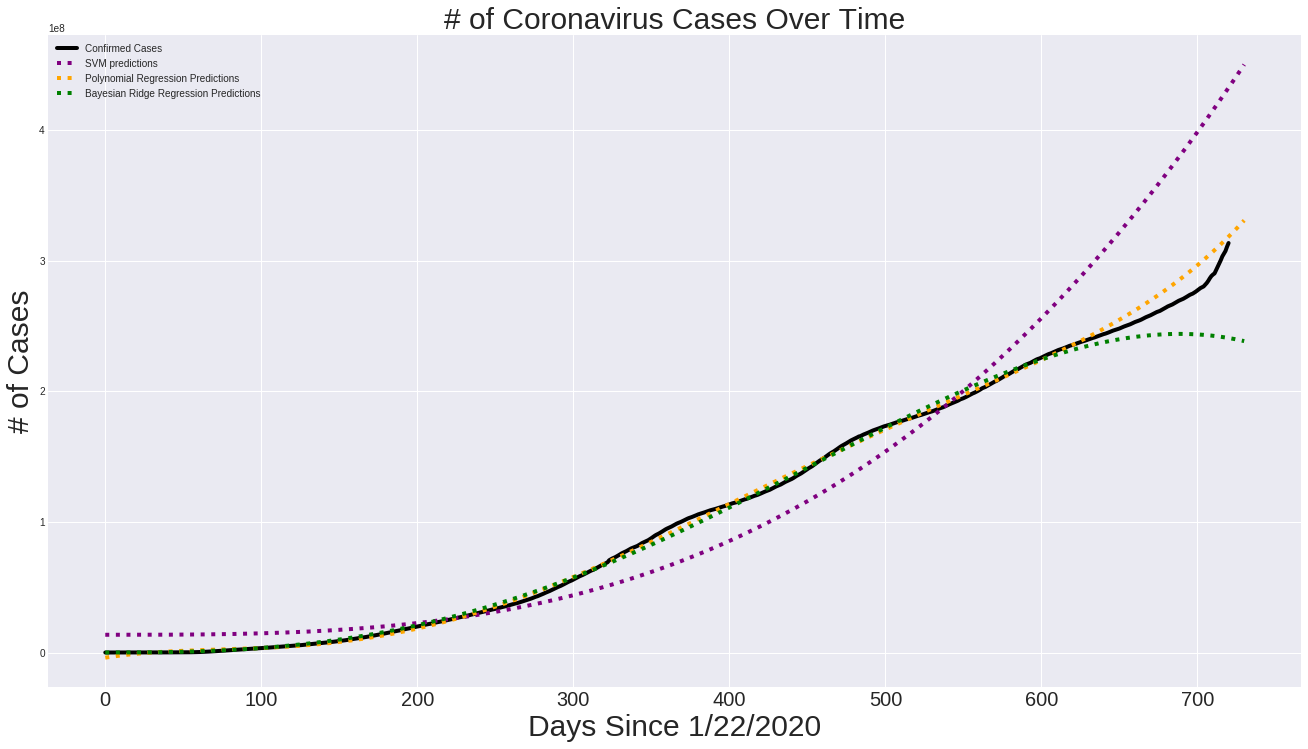

In [11]:
#10 Confirmed
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00X, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00X, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00X, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()

In [12]:
X_train_confirmed00XX, X_test_confirmed00XX, y_train_confirmed00XX, y_test_confirmed00XX = train_test_split(days_since_1_22[20:], world_cases[20:], test_size=0.12, shuffle=False)
# svm_confirmed = svm_search.best_estimator_
svm_confirmed00XX = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed00XX.fit(X_train_confirmed00XX, y_train_confirmed00XX)
svm_pred00XX = svm_confirmed00XX.predict(future_forcast)

# check against testing data
svm_test_pred00XX = svm_confirmed00XX.predict(X_test_confirmed00XX)
print('MAE:', mean_absolute_error(svm_test_pred00XX, y_test_confirmed00XX))
print('MSE:',mean_squared_error(svm_test_pred00XX, y_test_confirmed00XX))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed00XX = poly.fit_transform(X_train_confirmed00XX)
poly_X_test_confirmed00XX = poly.fit_transform(X_test_confirmed00XX)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00XX = PolynomialFeatures(degree=4)
bayesian_poly_X_train_confirmed00XX = bayesian_poly00XX.fit_transform(X_train_confirmed00XX)
bayesian_poly_X_test_confirmed00XX = bayesian_poly00XX.fit_transform(X_test_confirmed00XX)
bayesian_poly_future_forcast00XX = bayesian_poly00XX.fit_transform(future_forcast)

# polynomial regression
linear_model00XX = LinearRegression(normalize=True, fit_intercept=False)
linear_model00XX.fit(poly_X_train_confirmed00XX, y_train_confirmed00XX)
test_linear_pred00XX = linear_model00X.predict(poly_X_test_confirmed00XX)
linear_pred00XX = linear_model00X.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00XX, y_test_confirmed00XX))
print('MSE:',mean_squared_error(test_linear_pred00XX, y_test_confirmed00XX))

print(linear_model00XX.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00XX = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00XX = BayesianRidge(fit_intercept=False)
bayesian_search00XX = RandomizedSearchCV(bayesian00XX, bayesian_grid00XX, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00XX.fit(bayesian_poly_X_train_confirmed00XX, y_train_confirmed00XX)

bayesian_search00XX.best_params_

bayesian_confirmed = bayesian_search00XX.best_estimator_
test_bayesian_pred00XX = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed00XX)
bayesian_pred00XX = bayesian_confirmed.predict(bayesian_poly_future_forcast00XX)
print('MAE:', mean_absolute_error(test_bayesian_pred00XX, y_test_confirmed00XX))
print('MSE:',mean_squared_error(test_bayesian_pred00XX, y_test_confirmed00XX))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MAE: 97111387.53119835
MSE: 9864171508266876.0
MAE: 12031876.687224528
MSE: 170024664250587.78
[[-5.80103127e+06  2.34755549e+05 -2.69958128e+03  1.54043928e+01
  -2.69260370e-02  1.57264003e-05]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 23842631.627902586
MSE: 856231795743943.4


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


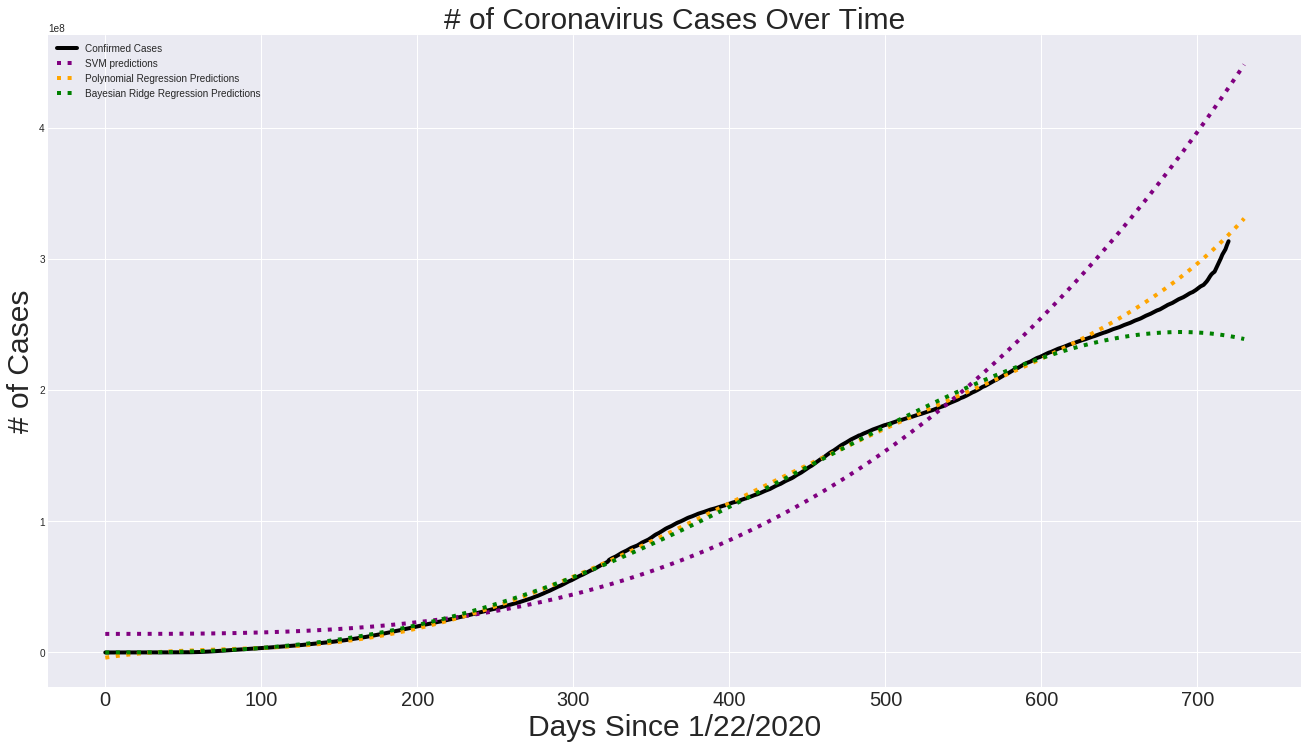

In [13]:
#20 confirmed
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00XX, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00XX, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00XX, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()

In [14]:
X_train_confirmed00XXX, X_test_confirmed00XXX, y_train_confirmed00XXX, y_test_confirmed00XXX = train_test_split(days_since_1_22[30:], world_cases[30:], test_size=0.12, shuffle=False)
# svm_confirmed = svm_search.best_estimator_
svm_confirmed00XXX = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed00XXX.fit(X_train_confirmed00XXX, y_train_confirmed00XXX)
svm_pred00XXX = svm_confirmed00XXX.predict(future_forcast)

# check against testing data
svm_test_pred00XXX = svm_confirmed00XXX.predict(X_test_confirmed00XXX)
print('MAE:', mean_absolute_error(svm_test_pred00XXX, y_test_confirmed00XXX))
print('MSE:',mean_squared_error(svm_test_pred00XXX, y_test_confirmed00XXX))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed00XXX = poly.fit_transform(X_train_confirmed00XXX)
poly_X_test_confirmed00XXX = poly.fit_transform(X_test_confirmed00XXX)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00XXX = PolynomialFeatures(degree=4)
bayesian_poly_X_train_confirmed00XXX = bayesian_poly00XXX.fit_transform(X_train_confirmed00XXX)
bayesian_poly_X_test_confirmed00XXX = bayesian_poly00XXX.fit_transform(X_test_confirmed00XXX)
bayesian_poly_future_forcast00XXX = bayesian_poly00XXX.fit_transform(future_forcast)

# polynomial regression
linear_model00XXX = LinearRegression(normalize=True, fit_intercept=False)
linear_model00XXX.fit(poly_X_train_confirmed00XXX, y_train_confirmed00XXX)
test_linear_pred00XXX = linear_model00X.predict(poly_X_test_confirmed00XXX)
linear_pred00XXX = linear_model00XXX.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00XXX, y_test_confirmed00XXX))
print('MSE:',mean_squared_error(test_linear_pred00XXX, y_test_confirmed00XXX))

print(linear_model00XXX.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00XXX = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00XXX = BayesianRidge(fit_intercept=False)
bayesian_search00XXX = RandomizedSearchCV(bayesian00XXX, bayesian_grid00XXX, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00XXX.fit(bayesian_poly_X_train_confirmed00XXX, y_train_confirmed00XXX)

bayesian_search00XXX.best_params_

bayesian_confirmed = bayesian_search00XXX.best_estimator_
test_bayesian_pred00XXX = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed00XXX)
bayesian_pred00XXX = bayesian_confirmed.predict(bayesian_poly_future_forcast00XXX)
print('MAE:', mean_absolute_error(test_bayesian_pred00XXX, y_test_confirmed00XXX))
print('MSE:',mean_squared_error(test_bayesian_pred00XXX, y_test_confirmed00XXX))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MAE: 95753041.6372622
MSE: 9565430307030882.0
MAE: 12239527.73514712
MSE: 173840548814684.62
[[-7.87404923e+06  2.79821408e+05 -3.02218997e+03  1.64108189e+01
  -2.83422988e-02  1.64617668e-05]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 23633658.26366594
MSE: 838728979392197.6


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.3s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


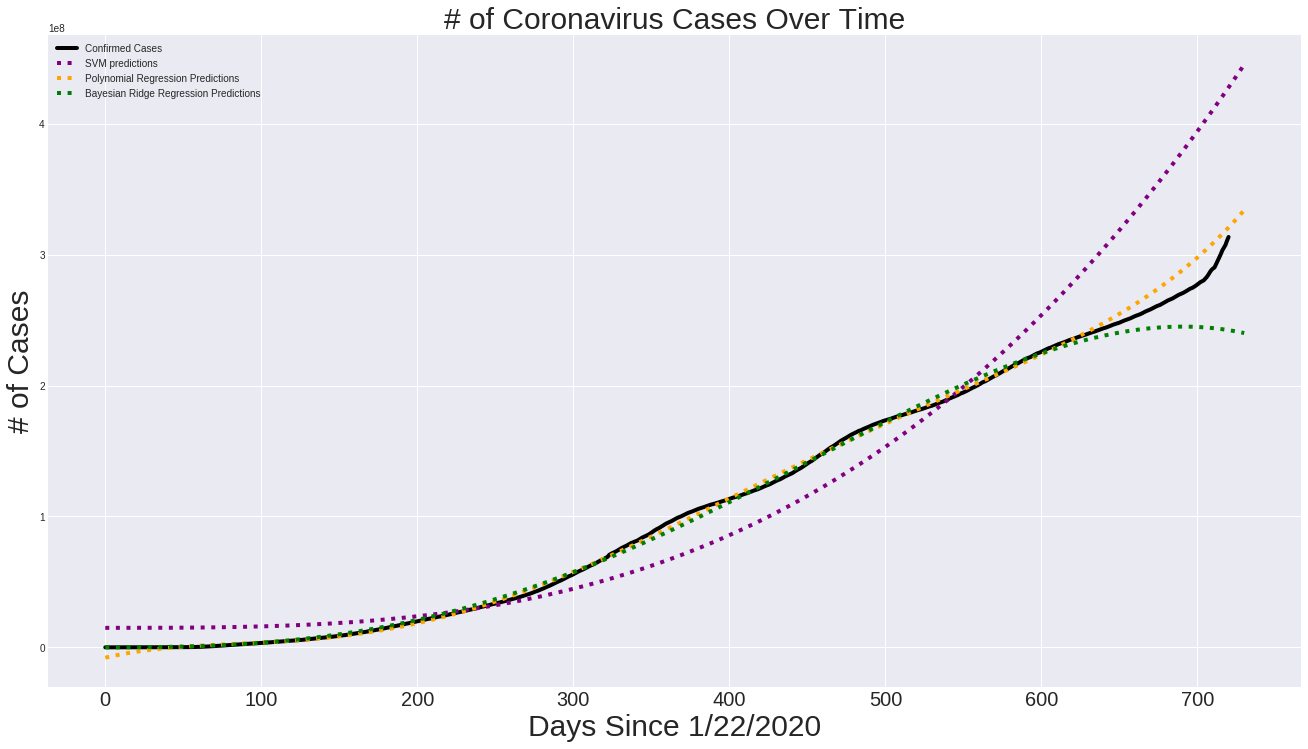

In [15]:
#30 confirmed
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00XXX, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00XXX, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00XXX, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()

In [16]:
X_train_confirmed00LX, X_test_confirmed00LX, y_train_confirmed00LX, y_test_confirmed00LX = train_test_split(days_since_1_22[40:], world_cases[40:], test_size=0.12, shuffle=False)
# svm_confirmed = svm_search.best_estimator_
svm_confirmed00LX = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed00LX.fit(X_train_confirmed00LX, y_train_confirmed00LX)
svm_pred00LX = svm_confirmed00LX.predict(future_forcast)

# check against testing data
svm_test_pred00LX = svm_confirmed00LX.predict(X_test_confirmed00LX)
print('MAE:', mean_absolute_error(svm_test_pred00LX, y_test_confirmed00LX))
print('MSE:',mean_squared_error(svm_test_pred00LX, y_test_confirmed00LX))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed00LX = poly.fit_transform(X_train_confirmed00LX)
poly_X_test_confirmed00LX = poly.fit_transform(X_test_confirmed00LX)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00LX = PolynomialFeatures(degree=4)
bayesian_poly_X_train_confirmed00LX = bayesian_poly00LX.fit_transform(X_train_confirmed00LX)
bayesian_poly_X_test_confirmed00LX = bayesian_poly00LX.fit_transform(X_test_confirmed00LX)
bayesian_poly_future_forcast00LX = bayesian_poly00LX.fit_transform(future_forcast)

# polynomial regression
linear_model00LX = LinearRegression(normalize=True, fit_intercept=False)
linear_model00LX.fit(poly_X_train_confirmed00LX, y_train_confirmed00LX)
test_linear_pred00LX = linear_model00LX.predict(poly_X_test_confirmed00LX)
linear_pred00LX = linear_model00LX.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00LX, y_test_confirmed00LX))
print('MSE:',mean_squared_error(test_linear_pred00LX, y_test_confirmed00LX))

print(linear_model00LX.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00LX = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00LX = BayesianRidge(fit_intercept=False)
bayesian_search00LX = RandomizedSearchCV(bayesian00LX, bayesian_grid00LX, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00LX.fit(bayesian_poly_X_train_confirmed00LX, y_train_confirmed00LX)

bayesian_search00LX.best_params_

bayesian_confirmed = bayesian_search00LX.best_estimator_
test_bayesian_pred00LX = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed00LX)
bayesian_pred00LX = bayesian_confirmed.predict(bayesian_poly_future_forcast00LX)
print('MAE:', mean_absolute_error(test_bayesian_pred00LX, y_test_confirmed00LX))
print('MSE:',mean_squared_error(test_bayesian_pred00LX, y_test_confirmed00LX))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MAE: 94526568.62541974
MSE: 9310823829948412.0
MAE: 13498653.752711494
MSE: 212953300741319.94
[[-1.01854648e+07  3.28008475e+05 -3.36249206e+03  1.74742184e+01
  -2.98567049e-02  1.72639848e-05]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 23534547.319904465
MSE: 830377273869574.4


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


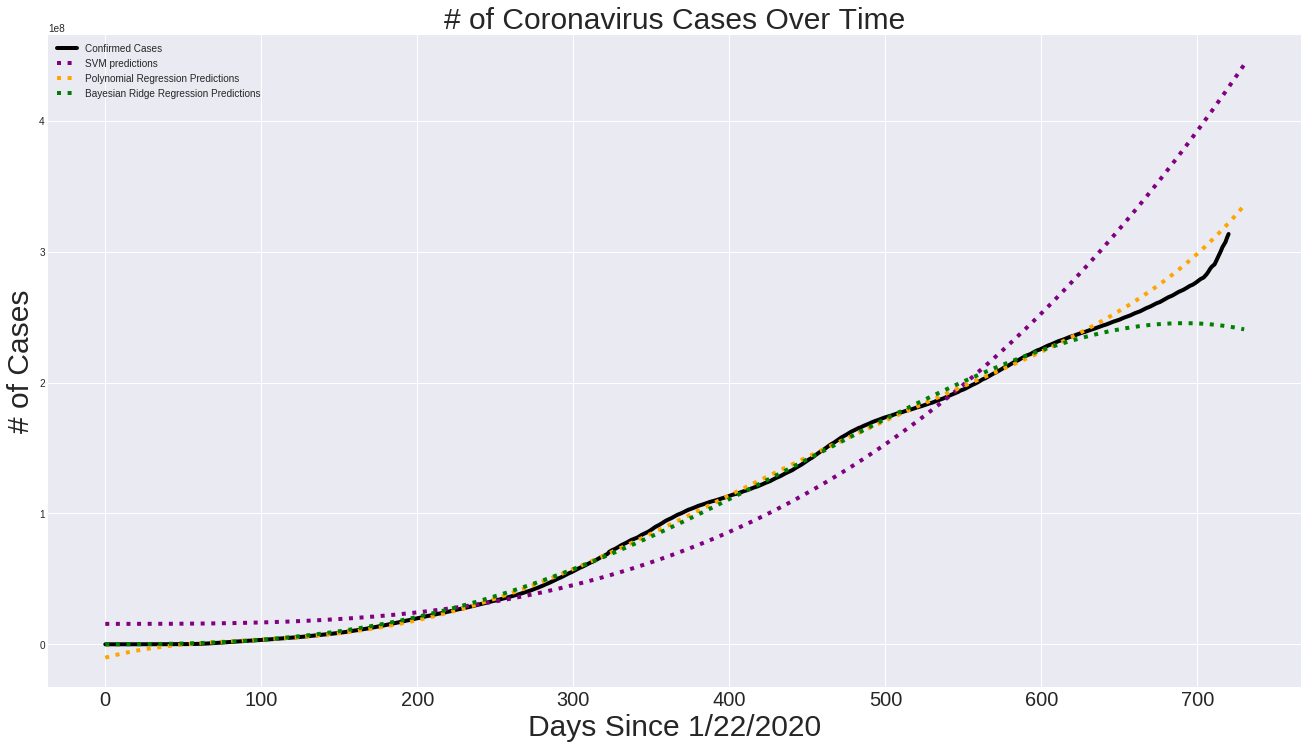

In [17]:
#40 confirmed
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00LX, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00LX, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00LX, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()

In [18]:
X_train_confirmed00L, X_test_confirmed00L, y_train_confirmed00L, y_test_confirmed00L = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.12, shuffle=False)
# svm_confirmed = svm_search.best_estimator_
svm_confirmed00L = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed00L.fit(X_train_confirmed00L, y_train_confirmed00L)
svm_pred00L = svm_confirmed00L.predict(future_forcast)

# check against testing data
svm_test_pred00L = svm_confirmed00L.predict(X_test_confirmed00L)
print('MAE:', mean_absolute_error(svm_test_pred00L, y_test_confirmed00L))
print('MSE:',mean_squared_error(svm_test_pred00L, y_test_confirmed00L))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed00L = poly.fit_transform(X_train_confirmed00L)
poly_X_test_confirmed00L = poly.fit_transform(X_test_confirmed00L)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00L = PolynomialFeatures(degree=4)
bayesian_poly_X_train_confirmed00L = bayesian_poly00L.fit_transform(X_train_confirmed00L)
bayesian_poly_X_test_confirmed00L = bayesian_poly00L.fit_transform(X_test_confirmed00L)
bayesian_poly_future_forcast00L = bayesian_poly00L.fit_transform(future_forcast)

# polynomial regression
linear_model00L = LinearRegression(normalize=True, fit_intercept=False)
linear_model00L.fit(poly_X_train_confirmed00L, y_train_confirmed00L)
test_linear_pred00L = linear_model00L.predict(poly_X_test_confirmed00L)
linear_pred00L = linear_model00L.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00L, y_test_confirmed00L))
print('MSE:',mean_squared_error(test_linear_pred00L, y_test_confirmed00L))

print(linear_model00L.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00L = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00L = BayesianRidge(fit_intercept=False)
bayesian_search00L = RandomizedSearchCV(bayesian00L, bayesian_grid00L, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00L.fit(bayesian_poly_X_train_confirmed00L, y_train_confirmed00L)

bayesian_search00L.best_params_

bayesian_confirmed = bayesian_search00L.best_estimator_
test_bayesian_pred00L = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed00L)
bayesian_pred00L = bayesian_confirmed.predict(bayesian_poly_future_forcast00L)
print('MAE:', mean_absolute_error(test_bayesian_pred00L, y_test_confirmed00L))
print('MSE:',mean_squared_error(test_bayesian_pred00L, y_test_confirmed00L))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MAE: 92218174.11440927
MSE: 8855078274023824.0
MAE: 13733271.858038513
MSE: 219836954071920.66
[[-1.22744544e+07  3.68914826e+05 -3.63812096e+03  1.83031374e+01
  -3.09978355e-02  1.78495538e-05]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 23432831.817201015
MSE: 821935030898337.1


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


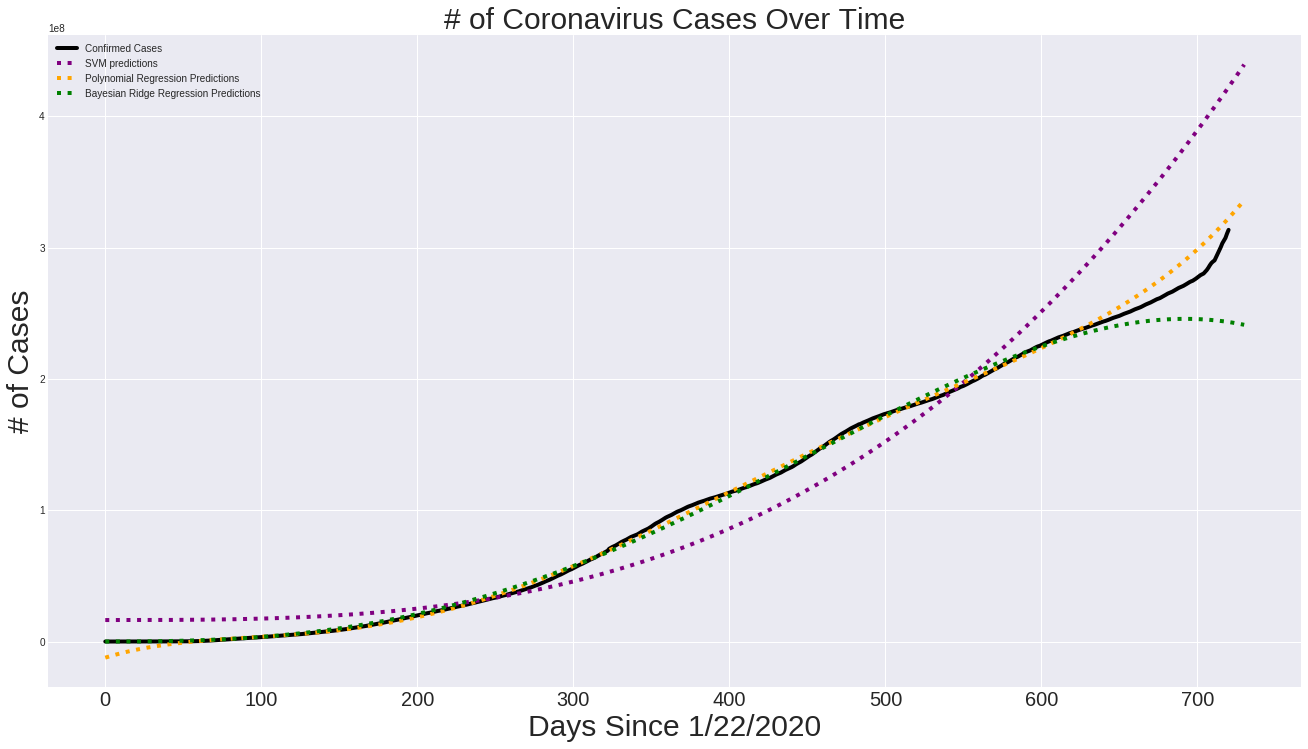

In [19]:
#50 confirmed
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00L, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00L, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00L, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()

In [20]:
# Future predictions using SVM 
svm_pred00X_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'SVM Predicted # of Confirmed Cases Worldwide (Input 10)': np.round(svm_pred00X[:-1])})
svm_pred00X_Confirmed_sub.to_csv('svm_pred00X_Confirmed_sub.csv', index = False)
svm_pred00X_Confirmed_sub

,Date,SVM Predicted # of Confirmed Cases Worldwide (Input 10)
0,01/22/2020,13568332.0
1,01/23/2020,13568333.0
2,01/24/2020,13568341.0
3,01/25/2020,13568362.0
4,01/26/2020,13568403.0
...,...,...
725,01/16/2022,441157875.0
726,01/17/2022,442929653.0
727,01/18/2022,444706318.0
728,01/19/2022,446487878.0


In [21]:
linear_pred00X = linear_pred00X.reshape(1,-1)[0]
linear_pred00X_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'Polynomial Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 10)': np.round(linear_pred00X[:-1])})
linear_pred00X_Confirmed_sub.to_csv('linear_pred00X_Confirmed_sub.csv', index = False)
linear_pred00X_Confirmed_sub

,Date,Polynomial Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 10)
0,01/22/2020,-3935591.0
1,01/23/2020,-3747851.0
2,01/24/2020,-3564736.0
3,01/25/2020,-3386161.0
4,01/26/2020,-3212043.0
...,...,...
725,01/16/2022,324448498.0
726,01/17/2022,325699174.0
727,01/18/2022,326960898.0
728,01/19/2022,328233783.0


In [22]:
bayesian_pred00X_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'Bayesian Ridge Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 10)': np.round(bayesian_pred00X[:-1])})
bayesian_pred00X_Confirmed_sub.to_csv('bayesian_pred00X_Confirmed_sub.csv', index = False)
bayesian_pred00X_Confirmed_sub

,Date,Bayesian Ridge Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 10)
0,01/22/2020,-0.0
1,01/23/2020,107.0
2,01/24/2020,445.0
3,01/25/2020,1033.0
4,01/26/2020,1884.0
...,...,...
725,01/16/2022,239685728.0
726,01/17/2022,239441875.0
727,01/18/2022,239190742.0
728,01/19/2022,238932291.0


In [23]:
linear_pred00XX = linear_pred00X.reshape(1,-1)[0]
linear_pred00XX_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'Polynomial Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 20)': np.round(linear_pred00XX[:-1])})
linear_pred00XX_Confirmed_sub.to_csv('linear_pred00X_Confirmed_sub.csv', index = False)
linear_pred00XX_Confirmed_sub

,Date,Polynomial Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 20)
0,01/22/2020,-3935591.0
1,01/23/2020,-3747851.0
2,01/24/2020,-3564736.0
3,01/25/2020,-3386161.0
4,01/26/2020,-3212043.0
...,...,...
725,01/16/2022,324448498.0
726,01/17/2022,325699174.0
727,01/18/2022,326960898.0
728,01/19/2022,328233783.0


In [24]:
# Future predictions using SVM 
svm_pred00X_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'SVM Predicted # of Confirmed Cases Worldwide (Input 10)': np.round(svm_pred00X[:-1])})
svm_pred00X_Confirmed_sub.to_csv('svm_pred00X_Confirmed_sub.csv', index = False)
svm_pred00X_Confirmed_sub

,Date,SVM Predicted # of Confirmed Cases Worldwide (Input 10)
0,01/22/2020,13568332.0
1,01/23/2020,13568333.0
2,01/24/2020,13568341.0
3,01/25/2020,13568362.0
4,01/26/2020,13568403.0
...,...,...
725,01/16/2022,441157875.0
726,01/17/2022,442929653.0
727,01/18/2022,444706318.0
728,01/19/2022,446487878.0


In [25]:
linear_pred00XX = linear_pred00XX.reshape(1,-1)[0]
linear_pred00XX_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'Polynomial Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 20)': np.round(linear_pred00XX[:-1])})
linear_pred00XX_Confirmed_sub.to_csv('linear_pred00X_Confirmed_sub.csv', index = False)
linear_pred00XX_Confirmed_sub

,Date,Polynomial Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 20)
0,01/22/2020,-3935591.0
1,01/23/2020,-3747851.0
2,01/24/2020,-3564736.0
3,01/25/2020,-3386161.0
4,01/26/2020,-3212043.0
...,...,...
725,01/16/2022,324448498.0
726,01/17/2022,325699174.0
727,01/18/2022,326960898.0
728,01/19/2022,328233783.0


In [26]:
bayesian_pred00XX_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'Bayesian Ridge Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 20)': np.round(bayesian_pred00XX[:-1])})
bayesian_pred00XX_Confirmed_sub.to_csv('bayesian_pred00X_Confirmed_sub.csv', index = False)
bayesian_pred00XX_Confirmed_sub

,Date,Bayesian Ridge Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 20)
0,01/22/2020,-0.0
1,01/23/2020,108.0
2,01/24/2020,454.0
3,01/25/2020,1052.0
4,01/26/2020,1918.0
...,...,...
725,01/16/2022,240226134.0
726,01/17/2022,239987877.0
727,01/18/2022,239742378.0
728,01/19/2022,239489600.0


In [27]:
# Future predictions using SVM 
svm_pred00XXX_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'SVM Predicted # of Confirmed Cases Worldwide (Input 30)': np.round(svm_pred00XXX[:-1])})
svm_pred00XXX_Confirmed_sub.to_csv('svm_pred00X_Confirmed_sub.csv', index = False)
svm_pred00XXX_Confirmed_sub

,Date,SVM Predicted # of Confirmed Cases Worldwide (Input 30)
0,01/22/2020,14880206.0
1,01/23/2020,14880208.0
2,01/24/2020,14880215.0
3,01/25/2020,14880236.0
4,01/26/2020,14880277.0
...,...,...
725,01/16/2022,436352210.0
726,01/17/2022,438098639.0
727,01/18/2022,439849885.0
728,01/19/2022,441605956.0


In [28]:
linear_pred00XXX = linear_pred00XXX.reshape(1,-1)[0]
linear_pred00XXX_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'Polynomial Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 30)': np.round(linear_pred00XXX[:-1])})
linear_pred00XXX_Confirmed_sub.to_csv('linear_pred00X_Confirmed_sub.csv', index = False)
linear_pred00XXX_Confirmed_sub

,Date,Polynomial Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 30)
0,01/22/2020,-7874049.0
1,01/23/2020,-7597234.0
2,01/24/2020,-7326364.0
3,01/25/2020,-7061344.0
4,01/26/2020,-6802076.0
...,...,...
725,01/16/2022,327166030.0
726,01/17/2022,328485425.0
727,01/18/2022,329816984.0
728,01/19/2022,331160830.0


In [29]:
bayesian_pred00XXX_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'Bayesian Ridge Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 30)': np.round(bayesian_pred00XXX[:-1])})
bayesian_pred00XXX_Confirmed_sub.to_csv('bayesian_pred00X_Confirmed_sub.csv', index = False)
bayesian_pred00XXX_Confirmed_sub

,Date,Bayesian Ridge Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 30)
0,01/22/2020,-0.0
1,01/23/2020,112.0
2,01/24/2020,470.0
3,01/25/2020,1089.0
4,01/26/2020,1985.0
...,...,...
725,01/16/2022,241294745.0
726,01/17/2022,241067615.0
727,01/18/2022,240833320.0
728,01/19/2022,240591823.0


In [30]:
# Future predictions using SVM 
svm_pred00LX_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'SVM Predicted # of Confirmed Cases Worldwide (Input 40)': np.round(svm_pred00LX[:-1])})
svm_pred00LX_Confirmed_sub.to_csv('svm_pred00X_Confirmed_sub.csv', index = False)
svm_pred00LX_Confirmed_sub

,Date,SVM Predicted # of Confirmed Cases Worldwide (Input 40)
0,01/22/2020,15608459.0
1,01/23/2020,15608460.0
2,01/24/2020,15608467.0
3,01/25/2020,15608488.0
4,01/26/2020,15608529.0
...,...,...
725,01/16/2022,434174503.0
726,01/17/2022,435908891.0
727,01/18/2022,437648063.0
728,01/19/2022,439392026.0


In [31]:
linear_pred00LX = linear_pred00LX.reshape(1,-1)[0]
linear_pred00LX_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'Polynomial Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 40)': np.round(linear_pred00LX[:-1])})
linear_pred00LX_Confirmed_sub.to_csv('linear_pred00X_Confirmed_sub.csv', index = False)
linear_pred00LX_Confirmed_sub

,Date,Polynomial Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 40)
0,01/22/2020,-10185465.0
1,01/23/2020,-9860801.0
2,01/24/2020,-9542759.0
3,01/25/2020,-9231232.0
4,01/26/2020,-8926120.0
...,...,...
725,01/16/2022,328442238.0
726,01/17/2022,329793247.0
727,01/18/2022,331156932.0
728,01/19/2022,332533423.0


In [32]:
bayesian_pred00LX_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'Bayesian Ridge Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 40)': np.round(bayesian_pred00LX[:-1])})
bayesian_pred00LX_Confirmed_sub.to_csv('bayesian_pred00X_Confirmed_sub.csv', index = False)
bayesian_pred00LX_Confirmed_sub

,Date,Bayesian Ridge Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 40)
0,01/22/2020,-0.0
1,01/23/2020,114.0
2,01/24/2020,479.0
3,01/25/2020,1108.0
4,01/26/2020,2018.0
...,...,...
725,01/16/2022,241819823.0
726,01/17/2022,241598179.0
727,01/18/2022,241369406.0
728,01/19/2022,241133470.0


In [33]:
# Future predictions using SVM 
svm_pred00L_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'SVM Predicted # of Confirmed Cases Worldwide (Input 50)': np.round(svm_pred00L[:-1])})
svm_pred00L_Confirmed_sub.to_csv('svm_pred00X_Confirmed_sub.csv', index = False)
svm_pred00L_Confirmed_sub

,Date,SVM Predicted # of Confirmed Cases Worldwide (Input 50)
0,01/22/2020,16366457.0
1,01/23/2020,16366458.0
2,01/24/2020,16366466.0
3,01/25/2020,16366487.0
4,01/26/2020,16366527.0
...,...,...
725,01/16/2022,430695913.0
726,01/17/2022,432412745.0
727,01/18/2022,434134314.0
728,01/19/2022,435860625.0


In [34]:
linear_pred00L = linear_pred00L.reshape(1,-1)[0]
linear_pred00L_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'Polynomial Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 50)': np.round(linear_pred00L[:-1])})
linear_pred00L_Confirmed_sub.to_csv('linear_pred00X_Confirmed_sub.csv', index = False)
linear_pred00L_Confirmed_sub

,Date,Polynomial Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 50)
0,01/22/2020,-12274454.0
1,01/23/2020,-11909159.0
2,01/24/2020,-11551031.0
3,01/25/2020,-11199961.0
4,01/26/2020,-10855842.0
...,...,...
725,01/16/2022,329034305.0
726,01/17/2022,330403290.0
727,01/18/2022,331785275.0
728,01/19/2022,333180394.0


In [35]:
bayesian_pred00L_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'Bayesian Ridge Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 50)': np.round(bayesian_pred00L[:-1])})
bayesian_pred00L_Confirmed_sub.to_csv('bayesian_pred00L_Confirmed_sub.csv', index = False)
bayesian_pred00L_Confirmed_sub

,Date,Bayesian Ridge Regression Predictions Predicted # of Confirmed Cases Worldwide (Input 50)
0,01/22/2020,-0.0
1,01/23/2020,117.0
2,01/24/2020,487.0
3,01/25/2020,1128.0
4,01/26/2020,2054.0
...,...,...
725,01/16/2022,242349802.0
726,01/17/2022,242133732.0
727,01/18/2022,241910572.0
728,01/19/2022,241680287.0


# Death Cases

In [36]:
X_train_deaths00X, X_test_deaths00X, y_train_deaths00X, y_test_deaths00X = train_test_split(days_since_1_22[10:], total_deaths[10:], test_size=0.12, shuffle=False)
# svm_deaths= svm_search.best_estimator_
svm_deaths00X = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_deaths00X.fit(X_train_deaths00X, y_train_deaths00X)
svm_pred00X = svm_deaths00X.predict(future_forcast)

# check against testing data
svm_test_pred00X = svm_deaths00X.predict(X_test_deaths00X)
print('MAE:', mean_absolute_error(svm_test_pred00X, y_test_deaths00X))
print('MSE:',mean_squared_error(svm_test_pred00X, y_test_deaths00X))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_deaths00X = poly.fit_transform(X_train_deaths00X)
poly_X_test_deaths00X = poly.fit_transform(X_test_deaths00X)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00X = PolynomialFeatures(degree=4)
bayesian_poly_X_train_deaths00X = bayesian_poly00X.fit_transform(X_train_deaths00X)
bayesian_poly_X_test_deaths00X = bayesian_poly00X.fit_transform(X_test_deaths00X)
bayesian_poly_future_forcast00X = bayesian_poly00X.fit_transform(future_forcast)

# polynomial regression
linear_model00X = LinearRegression(normalize=True, fit_intercept=False)
linear_model00X.fit(poly_X_train_deaths00X, y_train_deaths00X)
test_linear_pred00X = linear_model00X.predict(poly_X_test_deaths00X)
linear_pred00X = linear_model00X.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00X, y_test_deaths00X))
print('MSE:',mean_squared_error(test_linear_pred00X, y_test_deaths00X))

print(linear_model00X.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00X = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00X = BayesianRidge(fit_intercept=False)
bayesian_search00X = RandomizedSearchCV(bayesian00X, bayesian_grid00X, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00X.fit(bayesian_poly_X_train_deaths00X, y_train_deaths00X)

bayesian_search00X.best_params_

bayesian_deaths = bayesian_search00X.best_estimator_
test_bayesian_pred00X = bayesian_deaths.predict(bayesian_poly_X_test_deaths00X)
bayesian_pred00X = bayesian_deaths.predict(bayesian_poly_future_forcast00X)
print('MAE:', mean_absolute_error(test_bayesian_pred00X, y_test_deaths00X))
print('MSE:',mean_squared_error(test_bayesian_pred00X, y_test_deaths00X))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 2246006.534477837
MSE: 5368092367424.758
MAE: 228951.6528246063
MSE: 71112194729.38736
[[-1.58920216e+05  5.22238261e+03 -2.13332342e+01  1.12115694e-01
  -1.41555044e-04  4.47207640e-08]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 216125.62942289544
MSE: 65550166334.537994


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


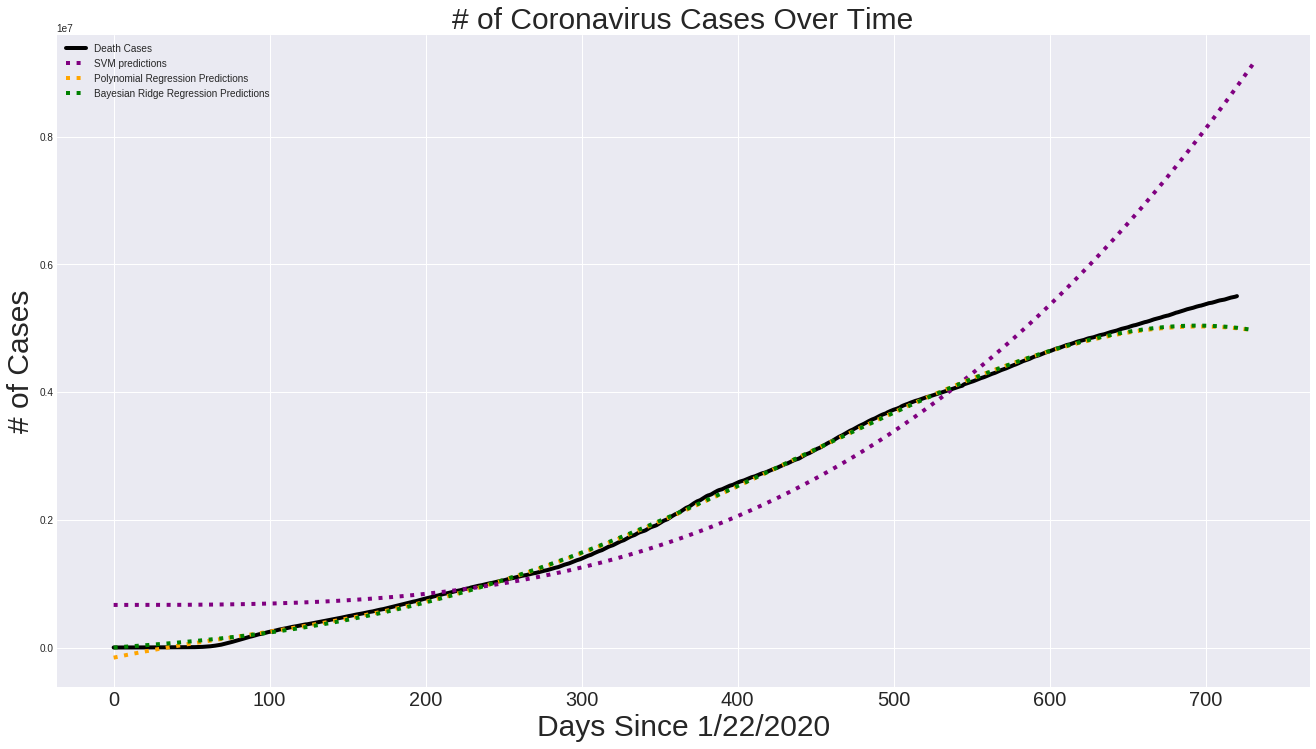

In [37]:
#10 deaths
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00X, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00X, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00X, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Death Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()

In [38]:
X_train_deaths00XX, X_test_deaths00XX, y_train_deaths00XX, y_test_deaths00XX = train_test_split(days_since_1_22[20:], total_deaths[20:], test_size=0.12, shuffle=False)
# svm_deaths = svm_search.best_estimator_
svm_deaths00XX = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_deaths00XX.fit(X_train_deaths00XX, y_train_deaths00XX)
svm_pred00XX = svm_deaths00XX.predict(future_forcast)

# check against testing data
svm_test_pred00XX = svm_deaths00XX.predict(X_test_deaths00XX)
print('MAE:', mean_absolute_error(svm_test_pred00XX, y_test_deaths00XX))
print('MSE:',mean_squared_error(svm_test_pred00XX, y_test_deaths00XX))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_deaths00XX = poly.fit_transform(X_train_deaths00XX)
poly_X_test_deaths00XX = poly.fit_transform(X_test_deaths00XX)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00XX = PolynomialFeatures(degree=4)
bayesian_poly_X_train_deaths00XX = bayesian_poly00XX.fit_transform(X_train_deaths00XX)
bayesian_poly_X_test_deaths00XX = bayesian_poly00XX.fit_transform(X_test_deaths00XX)
bayesian_poly_future_forcast00XX = bayesian_poly00XX.fit_transform(future_forcast)

# polynomial regression
linear_model00XX = LinearRegression(normalize=True, fit_intercept=False)
linear_model00XX.fit(poly_X_train_deaths00XX, y_train_deaths00XX)
test_linear_pred00XX = linear_model00X.predict(poly_X_test_deaths00XX)
linear_pred00XX = linear_model00X.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00XX, y_test_deaths00XX))
print('MSE:',mean_squared_error(test_linear_pred00XX, y_test_deaths00XX))

print(linear_model00XX.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00XX = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00XX = BayesianRidge(fit_intercept=False)
bayesian_search00XX = RandomizedSearchCV(bayesian00XX, bayesian_grid00XX, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00XX.fit(bayesian_poly_X_train_deaths00XX, y_train_deaths00XX)

bayesian_search00XX.best_params_

bayesian_deaths = bayesian_search00XX.best_estimator_
test_bayesian_pred00XX = bayesian_deaths.predict(bayesian_poly_X_test_deaths00XX)
bayesian_pred00XX = bayesian_deaths.predict(bayesian_poly_future_forcast00XX)
print('MAE:', mean_absolute_error(test_bayesian_pred00XX, y_test_deaths00XX))
print('MSE:',mean_squared_error(test_bayesian_pred00XX, y_test_deaths00XX))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 2215787.917816266
MSE: 5219894417599.72
MAE: 231130.87771589315
MSE: 71926323808.00311
[[-2.61142112e+05  7.73127707e+03 -4.12021346e+01  1.80140556e-01
  -2.46384258e-04  1.04395440e-07]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 216984.91696501756
MSE: 65681804582.98279


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


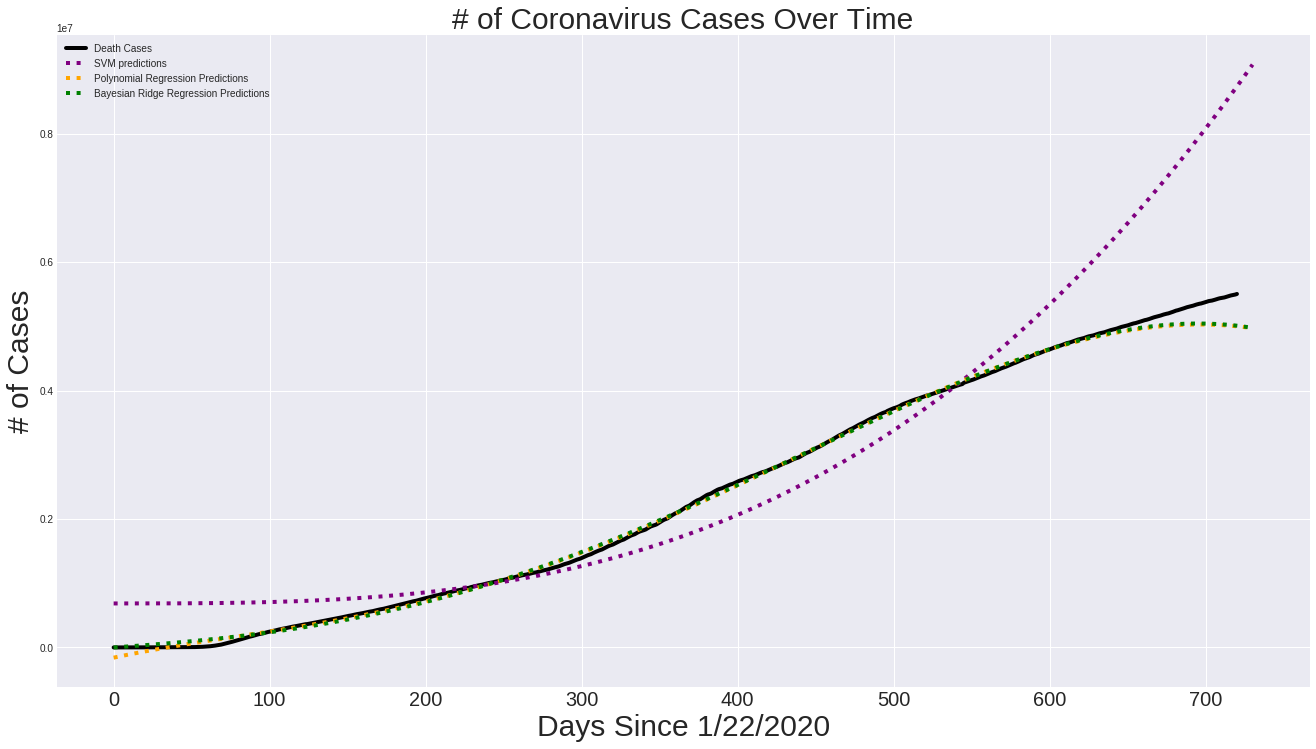

In [39]:
#20 deaths
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00XX, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00XX, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00XX, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Death Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()

In [40]:
X_train_deaths00XXX, X_test_deaths00XXX, y_train_deaths00XXX, y_test_deaths00XXX = train_test_split(days_since_1_22[30:], total_deaths[30:], test_size=0.12, shuffle=False)
# svm_deaths = svm_search.best_estimator_
svm_deaths00XXX = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_deaths00XXX.fit(X_train_deaths00XXX, y_train_deaths00XXX)
svm_pred00XXX = svm_deaths00XXX.predict(future_forcast)

# check against testing data
svm_test_pred00XXX = svm_deaths00XXX.predict(X_test_deaths00XXX)
print('MAE:', mean_absolute_error(svm_test_pred00XXX, y_test_deaths00XXX))
print('MSE:',mean_squared_error(svm_test_pred00XXX, y_test_deaths00XXX))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_deaths00XXX = poly.fit_transform(X_train_deaths00XXX)
poly_X_test_deaths00XXX = poly.fit_transform(X_test_deaths00XXX)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00XXX = PolynomialFeatures(degree=4)
bayesian_poly_X_train_deaths00XXX = bayesian_poly00XXX.fit_transform(X_train_deaths00XXX)
bayesian_poly_X_test_deaths00XXX = bayesian_poly00XXX.fit_transform(X_test_deaths00XXX)
bayesian_poly_future_forcast00XXX = bayesian_poly00XXX.fit_transform(future_forcast)

# polynomial regression
linear_model00XXX = LinearRegression(normalize=True, fit_intercept=False)
linear_model00XXX.fit(poly_X_train_deaths00XXX, y_train_deaths00XXX)
test_linear_pred00XXX = linear_model00X.predict(poly_X_test_deaths00XXX)
linear_pred00XXX = linear_model00XXX.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00XXX, y_test_deaths00XXX))
print('MSE:',mean_squared_error(test_linear_pred00XXX, y_test_deaths00XXX))

print(linear_model00XXX.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00XXX = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00XXX = BayesianRidge(fit_intercept=False)
bayesian_search00XXX = RandomizedSearchCV(bayesian00XXX, bayesian_grid00XXX, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00XXX.fit(bayesian_poly_X_train_deaths00XXX, y_train_deaths00XXX)

bayesian_search00XXX.best_params_

bayesian_deaths = bayesian_search00XXX.best_estimator_
test_bayesian_pred00XXX = bayesian_deaths.predict(bayesian_poly_X_test_deaths00XXX)
bayesian_pred00XXX = bayesian_deaths.predict(bayesian_poly_future_forcast00XXX)
print('MAE:', mean_absolute_error(test_bayesian_pred00XXX, y_test_deaths00XXX))
print('MSE:',mean_squared_error(test_bayesian_pred00XXX, y_test_deaths00XXX))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 2185402.4812504244
MSE: 5066602303273.423
MAE: 235525.89892395792
MSE: 73602169613.19652
[[-4.06161968e+05  1.10561810e+04 -6.64979722e+01  2.64501577e-01
  -3.73994449e-04  1.76030881e-07]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MAE: 219315.97750577232
MSE: 66317788417.18882


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


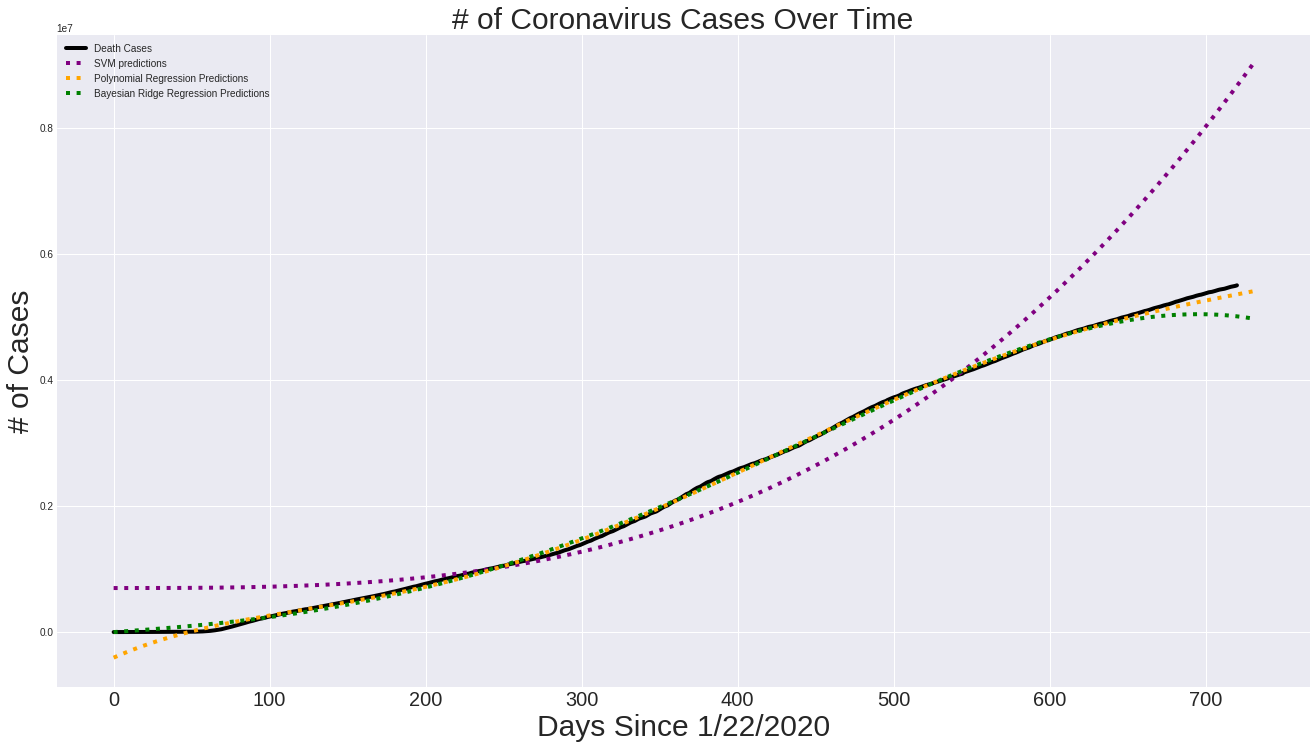

In [41]:
#30 deaths
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00XXX, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00XXX, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00XXX, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Death Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()

In [42]:
X_train_deaths00LX, X_test_deaths00LX, y_train_deaths00LX, y_test_deaths00LX = train_test_split(days_since_1_22[40:], total_deaths[40:], test_size=0.12, shuffle=False)
# svm_deaths = svm_search.best_estimator_
svm_deaths00LX = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_deaths00LX.fit(X_train_deaths00LX, y_train_deaths00LX)
svm_pred00LX = svm_deaths00LX.predict(future_forcast)

# check against testing data
svm_test_pred00LX = svm_deaths00LX.predict(X_test_deaths00LX)
print('MAE:', mean_absolute_error(svm_test_pred00LX, y_test_deaths00LX))
print('MSE:',mean_squared_error(svm_test_pred00LX, y_test_deaths00LX))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_deaths00LX = poly.fit_transform(X_train_deaths00LX)
poly_X_test_deaths00LX = poly.fit_transform(X_test_deaths00LX)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00LX = PolynomialFeatures(degree=4)
bayesian_poly_X_train_deaths00LX = bayesian_poly00LX.fit_transform(X_train_deaths00LX)
bayesian_poly_X_test_deaths00LX = bayesian_poly00LX.fit_transform(X_test_deaths00LX)
bayesian_poly_future_forcast00LX = bayesian_poly00LX.fit_transform(future_forcast)

# polynomial regression
linear_model00LX = LinearRegression(normalize=True, fit_intercept=False)
linear_model00LX.fit(poly_X_train_deaths00LX, y_train_deaths00LX)
test_linear_pred00LX = linear_model00LX.predict(poly_X_test_deaths00LX)
linear_pred00LX = linear_model00LX.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00LX, y_test_deaths00LX))
print('MSE:',mean_squared_error(test_linear_pred00LX, y_test_deaths00LX))

print(linear_model00LX.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00LX = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00LX = BayesianRidge(fit_intercept=False)
bayesian_search00LX = RandomizedSearchCV(bayesian00LX, bayesian_grid00LX, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00LX.fit(bayesian_poly_X_train_deaths00LX, y_train_deaths00LX)

bayesian_search00LX.best_params_

bayesian_deaths = bayesian_search00LX.best_estimator_
test_bayesian_pred00LX = bayesian_deaths.predict(bayesian_poly_X_test_deaths00LX)
bayesian_pred00LX = bayesian_deaths.predict(bayesian_poly_future_forcast00LX)
print('MAE:', mean_absolute_error(test_bayesian_pred00LX, y_test_deaths00LX))
print('MSE:',mean_squared_error(test_bayesian_pred00LX, y_test_deaths00LX))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 2158599.078484814
MSE: 4938955519428.183
MAE: 8177.371265963175
MSE: 137320883.10703528
[[-5.93005953e+05  1.50649378e+04 -9.57287249e+01  3.59063292e-01
  -5.13711573e-04  2.52970494e-07]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 225440.43725690633
MSE: 69482646159.27751


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


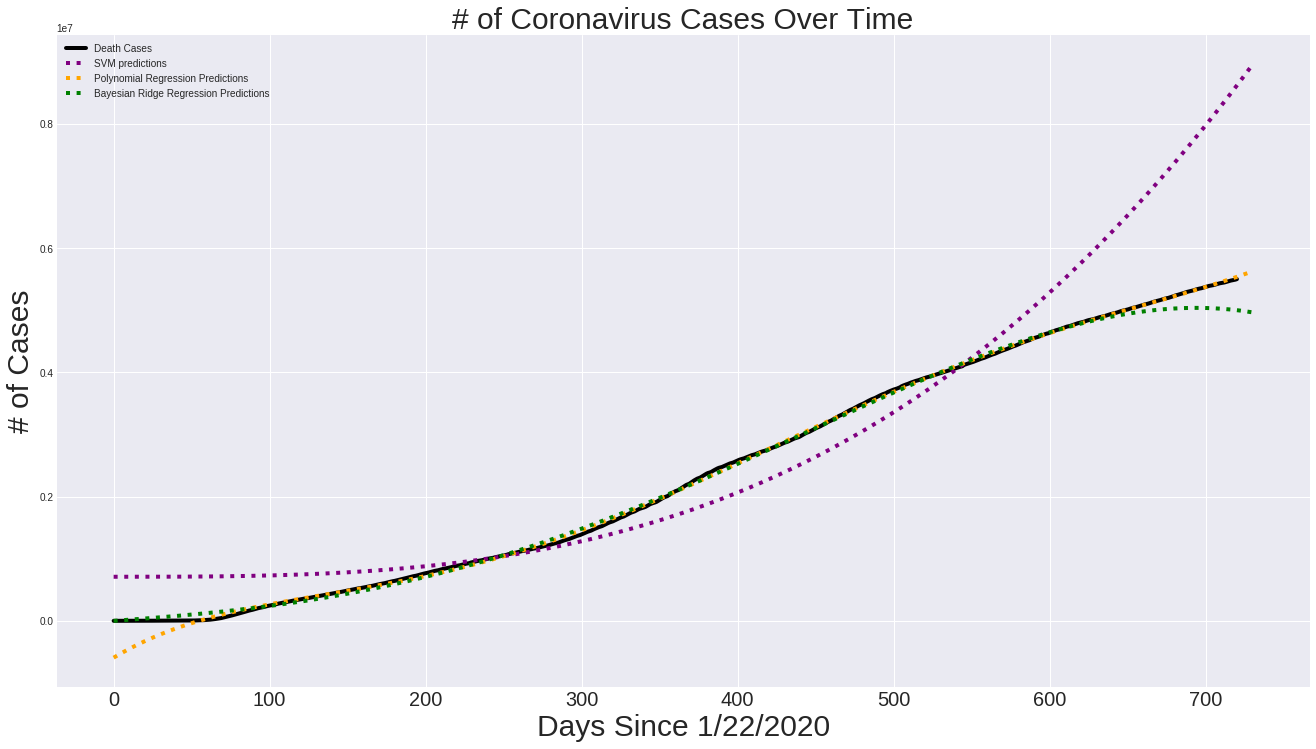

In [43]:
#40 deaths
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00LX, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00LX, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00LX, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Death Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()

In [44]:
X_train_deaths00L, X_test_deaths00L, y_train_deaths00L, y_test_deaths00L = train_test_split(days_since_1_22[50:], total_deaths[50:], test_size=0.12, shuffle=False)
# svm_deaths = svm_search.best_estimator_
svm_deaths00L = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_deaths00L.fit(X_train_deaths00L, y_train_deaths00L)
svm_pred00L = svm_deaths00L.predict(future_forcast)

# check against testing data
svm_test_pred00L = svm_deaths00L.predict(X_test_deaths00L)
print('MAE:', mean_absolute_error(svm_test_pred00L, y_test_deaths00L))
print('MSE:',mean_squared_error(svm_test_pred00L, y_test_deaths00L))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_deaths00L = poly.fit_transform(X_train_deaths00L)
poly_X_test_deaths00L = poly.fit_transform(X_test_deaths00L)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00L = PolynomialFeatures(degree=4)
bayesian_poly_X_train_deaths00L = bayesian_poly00L.fit_transform(X_train_deaths00L)
bayesian_poly_X_test_deaths00L = bayesian_poly00L.fit_transform(X_test_deaths00L)
bayesian_poly_future_forcast00L = bayesian_poly00L.fit_transform(future_forcast)

# polynomial regression
linear_model00L = LinearRegression(normalize=True, fit_intercept=False)
linear_model00L.fit(poly_X_train_deaths00L, y_train_deaths00L)
test_linear_pred00L = linear_model00L.predict(poly_X_test_deaths00L)
linear_pred00L = linear_model00L.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00L, y_test_deaths00L))
print('MSE:',mean_squared_error(test_linear_pred00L, y_test_deaths00L))

print(linear_model00L.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00L = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00L = BayesianRidge(fit_intercept=False)
bayesian_search00L = RandomizedSearchCV(bayesian00L, bayesian_grid00L, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00L.fit(bayesian_poly_X_train_deaths00L, y_train_deaths00L)

bayesian_search00L.best_params_

bayesian_deaths = bayesian_search00L.best_estimator_
test_bayesian_pred00L = bayesian_deaths.predict(bayesian_poly_X_test_deaths00L)
bayesian_pred00L = bayesian_deaths.predict(bayesian_poly_future_forcast00L)
print('MAE:', mean_absolute_error(test_bayesian_pred00L, y_test_deaths00L))
print('MSE:',mean_squared_error(test_bayesian_pred00L, y_test_deaths00L))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 2112883.368048774
MSE: 4730434401673.191
MAE: 72246.99161572938
MSE: 8120186972.697561
[[-8.06315525e+05  1.93993871e+04 -1.26216705e+02  4.55215243e-01
  -6.53090411e-04  3.28582246e-07]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MAE: 235617.98510832983
MSE: 75142229322.32884


[Parallel(n_jobs=-1)]: Done 113 out of 120 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


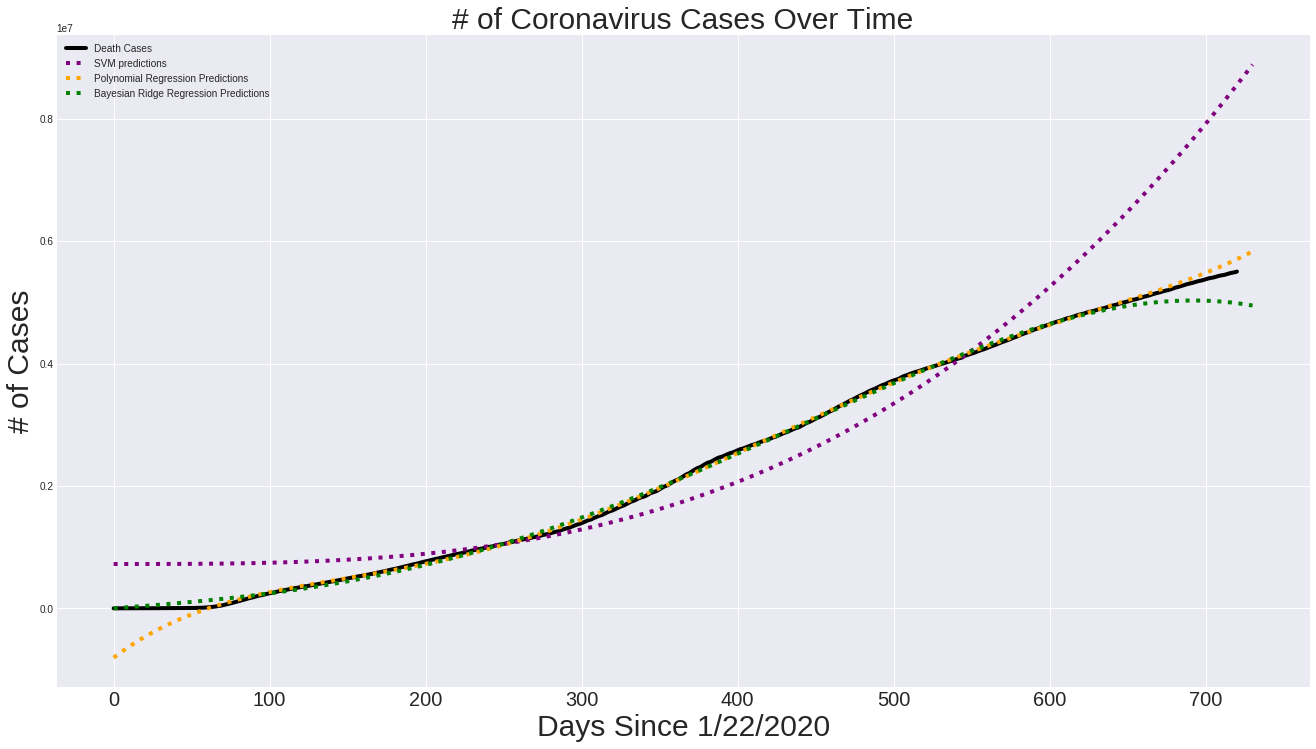

In [45]:
#50 deaths
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00L, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00L, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00L, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Death Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()

In [46]:
# Future predictions using SVM 
svm_pred00X_Confirmed_sub = pd.DataFrame({'Date': future_forcast_dates[:-1], 'SVM Predicted # of Confirmed Cases Worldwide (Input 10)': np.round(svm_pred00X[:-1])})
svm_pred00X_Confirmed_sub.to_csv('svm_pred00X_Confirmed_sub.csv', index = False)
svm_pred00X_Confirmed_sub

,Date,SVM Predicted # of Confirmed Cases Worldwide (Input 10)
0,01/22/2020,666763.0
1,01/23/2020,666763.0
2,01/24/2020,666763.0
3,01/25/2020,666764.0
4,01/26/2020,666765.0
...,...,...
725,01/16/2022,8957858.0
726,01/17/2022,8992213.0
727,01/18/2022,9026664.0
728,01/19/2022,9061209.0


# Recovered Cases

In [47]:
X_train_deaths00X, X_test_deaths00X, y_train_deaths00X, y_test_deaths00X = train_test_split(days_since_1_22[10:], total_recovered[10:], test_size=0.12, shuffle=False)
# svm_deaths= svm_search.best_estimator_
svm_deaths00X = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_deaths00X.fit(X_train_deaths00X, y_train_deaths00X)
svm_pred00X = svm_deaths00X.predict(future_forcast)

# check against testing data
svm_test_pred00X = svm_deaths00X.predict(X_test_deaths00X)
print('MAE:', mean_absolute_error(svm_test_pred00X, y_test_deaths00X))
print('MSE:',mean_squared_error(svm_test_pred00X, y_test_deaths00X))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_deaths00X = poly.fit_transform(X_train_deaths00X)
poly_X_test_deaths00X = poly.fit_transform(X_test_deaths00X)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00X = PolynomialFeatures(degree=4)
bayesian_poly_X_train_deaths00X = bayesian_poly00X.fit_transform(X_train_deaths00X)
bayesian_poly_X_test_deaths00X = bayesian_poly00X.fit_transform(X_test_deaths00X)
bayesian_poly_future_forcast00X = bayesian_poly00X.fit_transform(future_forcast)

# polynomial regression
linear_model00X = LinearRegression(normalize=True, fit_intercept=False)
linear_model00X.fit(poly_X_train_deaths00X, y_train_deaths00X)
test_linear_pred00X = linear_model00X.predict(poly_X_test_deaths00X)
linear_pred00X = linear_model00X.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00X, y_test_deaths00X))
print('MSE:',mean_squared_error(test_linear_pred00X, y_test_deaths00X))

print(linear_model00X.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00X = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00X = BayesianRidge(fit_intercept=False)
bayesian_search00X = RandomizedSearchCV(bayesian00X, bayesian_grid00X, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00X.fit(bayesian_poly_X_train_deaths00X, y_train_deaths00X)

bayesian_search00X.best_params_

bayesian_deaths = bayesian_search00X.best_estimator_
test_bayesian_pred00X = bayesian_deaths.predict(bayesian_poly_X_test_deaths00X)
bayesian_pred00X = bayesian_deaths.predict(bayesian_poly_future_forcast00X)
print('MAE:', mean_absolute_error(test_bayesian_pred00X, y_test_deaths00X))
print('MSE:',mean_squared_error(test_bayesian_pred00X, y_test_deaths00X))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MAE: 239012424.5825489
MSE: 5.7762042180860424e+16
MAE: 215614378.93135363
MSE: 5.856134592212183e+16
[[-3.15502838e+06  7.17826997e+04 -5.87280562e+01 -1.87067655e+00
   1.42371341e-02 -1.84832461e-05]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 96977647.39268202
MSE: 1.2149622853285734e+16


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


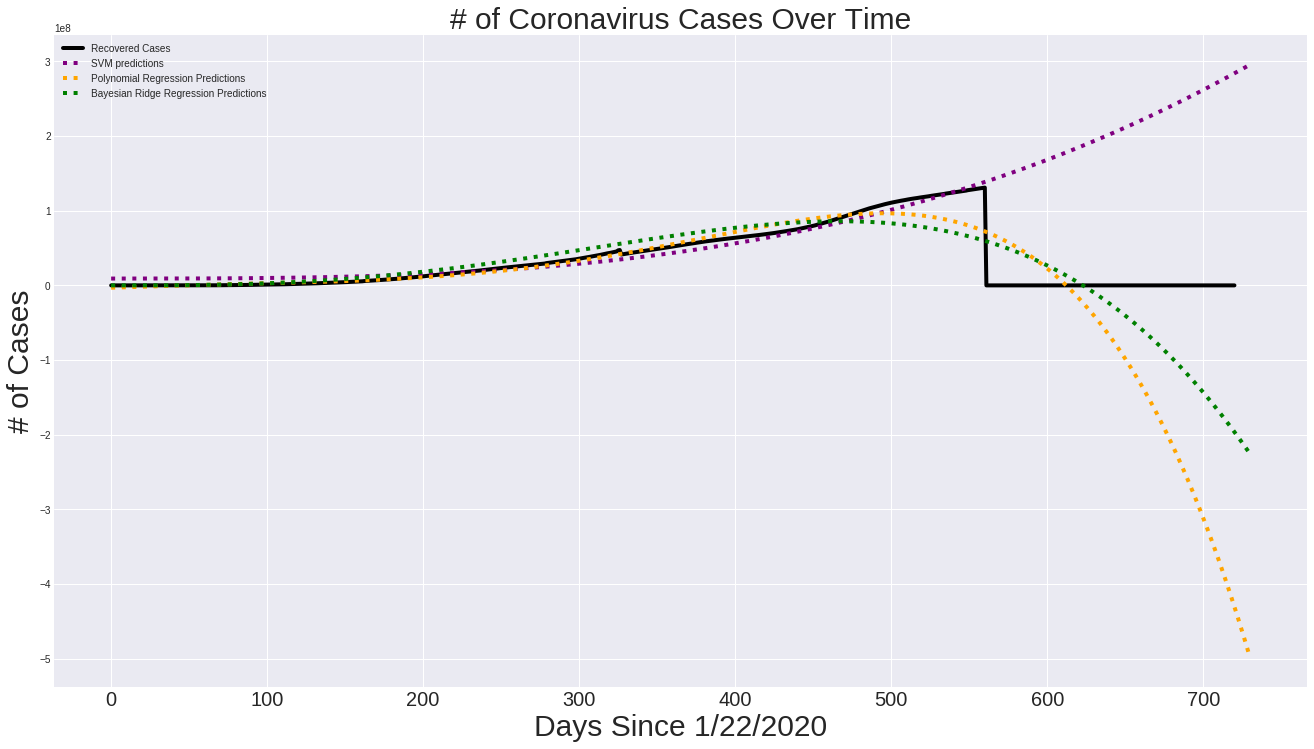

In [48]:
#10 deaths
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00X, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00X, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00X, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Recovered Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()

In [49]:
X_train_deaths00XX, X_test_deaths00XX, y_train_deaths00XX, y_test_deaths00XX = train_test_split(days_since_1_22[20:], total_recovered[20:], test_size=0.12, shuffle=False)
# svm_deaths = svm_search.best_estimator
svm_deaths00XX = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_deaths00XX.fit(X_train_deaths00XX, y_train_deaths00XX)
svm_pred00XX = svm_deaths00XX.predict(future_forcast)

# check against testing data
svm_test_pred00XX = svm_deaths00XX.predict(X_test_deaths00XX)
print('MAE:', mean_absolute_error(svm_test_pred00XX, y_test_deaths00XX))
print('MSE:',mean_squared_error(svm_test_pred00XX, y_test_deaths00XX))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_deaths00XX = poly.fit_transform(X_train_deaths00XX)
poly_X_test_deaths00XX = poly.fit_transform(X_test_deaths00XX)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00XX = PolynomialFeatures(degree=4)
bayesian_poly_X_train_deaths00XX = bayesian_poly00XX.fit_transform(X_train_deaths00XX)
bayesian_poly_X_test_deaths00XX = bayesian_poly00XX.fit_transform(X_test_deaths00XX)
bayesian_poly_future_forcast00XX = bayesian_poly00XX.fit_transform(future_forcast)

# polynomial regression
linear_model00XX = LinearRegression(normalize=True, fit_intercept=False)
linear_model00XX.fit(poly_X_train_deaths00XX, y_train_deaths00XX)
test_linear_pred00XX = linear_model00X.predict(poly_X_test_deaths00XX)
linear_pred00XX = linear_model00X.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00XX, y_test_deaths00XX))
print('MSE:',mean_squared_error(test_linear_pred00XX, y_test_deaths00XX))

print(linear_model00XX.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00XX = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00XX = BayesianRidge(fit_intercept=False)
bayesian_search00XX = RandomizedSearchCV(bayesian00XX, bayesian_grid00XX, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00XX.fit(bayesian_poly_X_train_deaths00XX, y_train_deaths00XX)

bayesian_search00XX.best_params_

bayesian_deaths = bayesian_search00XX.best_estimator_
test_bayesian_pred00XX = bayesian_deaths.predict(bayesian_poly_X_test_deaths00XX)
bayesian_pred00XX = bayesian_deaths.predict(bayesian_poly_future_forcast00XX)
print('MAE:', mean_absolute_error(test_bayesian_pred00XX, y_test_deaths00XX))
print('MSE:',mean_squared_error(test_bayesian_pred00XX, y_test_deaths00XX))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MAE: 238224081.20683163
MSE: 5.7362550910846456e+16
MAE: 217519065.39997688
MSE: 5.921635691200447e+16
[[-6.82412220e+06  1.77089925e+05 -1.01912766e+03  1.85699650e+00
   7.81277912e-03 -1.44399528e-05]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 97237084.84645474
MSE: 1.2138929920655296e+16


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


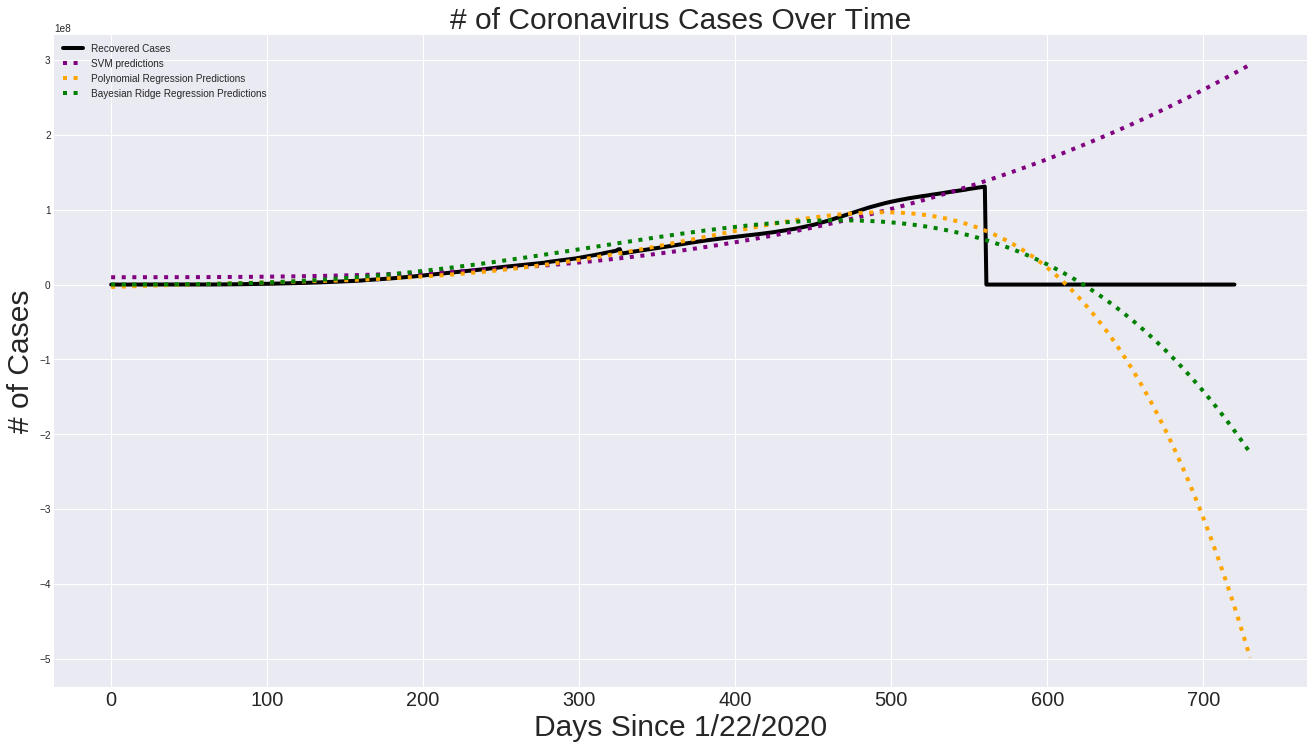

In [50]:
#20 deaths
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00XX, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00XX, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00XX, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Recovered Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()

In [51]:
X_train_deaths00XXX, X_test_deaths00XXX, y_train_deaths00XXX, y_test_deaths00XXX = train_test_split(days_since_1_22[30:], total_recovered[30:], test_size=0.12, shuffle=False)
# svm_recovered = svm_search.best_estimator_
svm_deaths00XXX = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_deaths00XXX.fit(X_train_deaths00XXX, y_train_deaths00XXX)
svm_pred00XXX = svm_deaths00XXX.predict(future_forcast)

# check against testing data
svm_test_pred00XXX = svm_deaths00XXX.predict(X_test_deaths00XXX)
print('MAE:', mean_absolute_error(svm_test_pred00XXX, y_test_deaths00XXX))
print('MSE:',mean_squared_error(svm_test_pred00XXX, y_test_deaths00XXX))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_deaths00XXX = poly.fit_transform(X_train_deaths00XXX)
poly_X_test_deaths00XXX = poly.fit_transform(X_test_deaths00XXX)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00XXX = PolynomialFeatures(degree=4)
bayesian_poly_X_train_deaths00XXX = bayesian_poly00XXX.fit_transform(X_train_deaths00XXX)
bayesian_poly_X_test_deaths00XXX = bayesian_poly00XXX.fit_transform(X_test_deaths00XXX)
bayesian_poly_future_forcast00XXX = bayesian_poly00XXX.fit_transform(future_forcast)

# polynomial regression
linear_model00XXX = LinearRegression(normalize=True, fit_intercept=False)
linear_model00XXX.fit(poly_X_train_deaths00XXX, y_train_deaths00XXX)
test_linear_pred00XXX = linear_model00X.predict(poly_X_test_deaths00XXX)
linear_pred00XXX = linear_model00XXX.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00XXX, y_test_deaths00XXX))
print('MSE:',mean_squared_error(test_linear_pred00XXX, y_test_deaths00XXX))

print(linear_model00XXX.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00XXX = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00XXX = BayesianRidge(fit_intercept=False)
bayesian_search00XXX = RandomizedSearchCV(bayesian00XXX, bayesian_grid00XXX, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00XXX.fit(bayesian_poly_X_train_deaths00XXX, y_train_deaths00XXX)

bayesian_search00XXX.best_params_

bayesian_deaths = bayesian_search00XXX.best_estimator_
test_bayesian_pred00XXX = bayesian_deaths.predict(bayesian_poly_X_test_deaths00XXX)
bayesian_pred00XXX = bayesian_deaths.predict(bayesian_poly_future_forcast00XXX)
print('MAE:', mean_absolute_error(test_bayesian_pred00XXX, y_test_deaths00XXX))
print('MSE:',mean_squared_error(test_bayesian_pred00XXX, y_test_deaths00XXX))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MAE: 237307881.15139064
MSE: 5.688866197037991e+16
MAE: 221367170.6137631
MSE: 6.0562645780999256e+16
[[-1.49077653e+07  3.95797494e+05 -2.95429967e+03  9.23821835e+00
  -4.76723876e-03 -6.58357749e-06]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 97656388.00270581
MSE: 1.209791141302958e+16


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


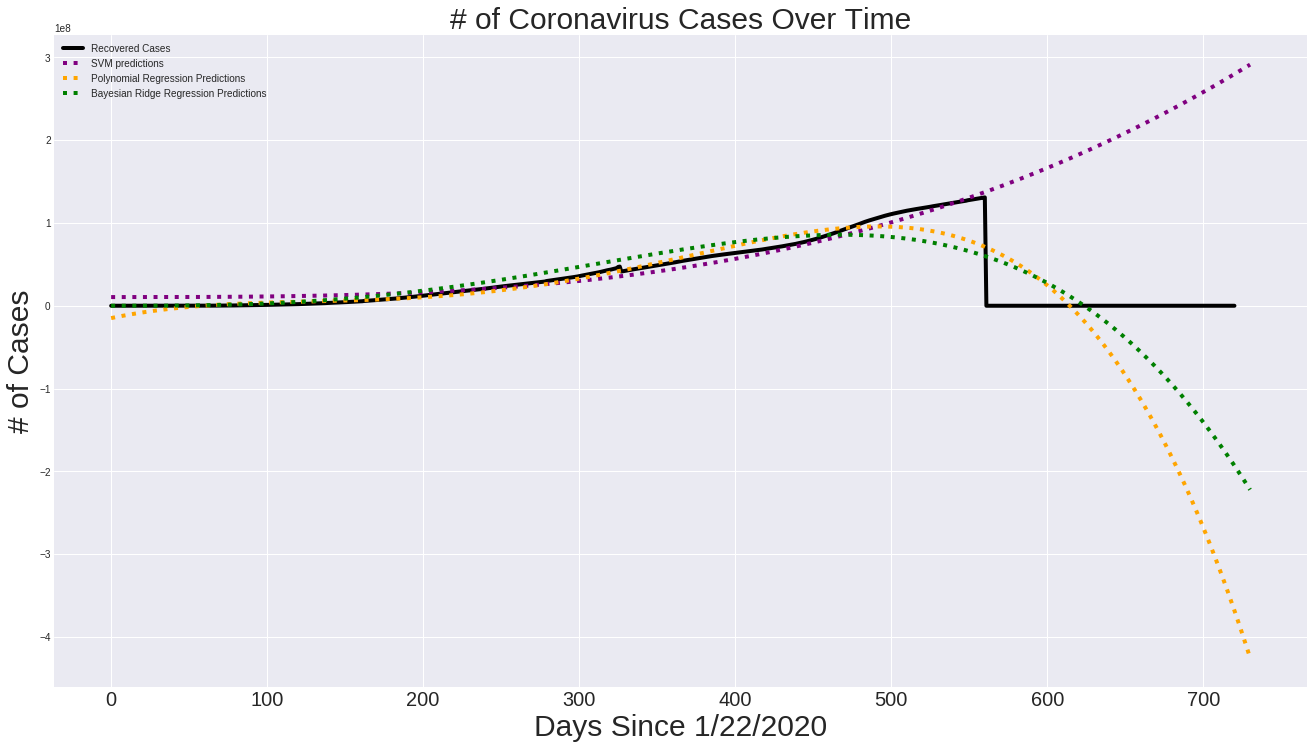

In [52]:
#30 recovered
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00XXX, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00XXX, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00XXX, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Recovered Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()

In [53]:
X_train_deaths00LX, X_test_deaths00LX, y_train_deaths00LX, y_test_deaths00LX = train_test_split(days_since_1_22[40:], total_recovered[40:], test_size=0.12, shuffle=False)
# svm_recovered = svm_search.best_estimator_
svm_deaths00LX = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_deaths00LX.fit(X_train_deaths00LX, y_train_deaths00LX)
svm_pred00LX = svm_deaths00LX.predict(future_forcast)

# check against testing data
svm_test_pred00LX = svm_deaths00LX.predict(X_test_deaths00LX)
print('MAE:', mean_absolute_error(svm_test_pred00LX, y_test_deaths00LX))
print('MSE:',mean_squared_error(svm_test_pred00LX, y_test_deaths00LX))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_deaths00LX = poly.fit_transform(X_train_deaths00LX)
poly_X_test_deaths00LX = poly.fit_transform(X_test_deaths00LX)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00LX = PolynomialFeatures(degree=4)
bayesian_poly_X_train_deaths00LX = bayesian_poly00LX.fit_transform(X_train_deaths00LX)
bayesian_poly_X_test_deaths00LX = bayesian_poly00LX.fit_transform(X_test_deaths00LX)
bayesian_poly_future_forcast00LX = bayesian_poly00LX.fit_transform(future_forcast)

# polynomial regression
linear_model00LX = LinearRegression(normalize=True, fit_intercept=False)
linear_model00LX.fit(poly_X_train_deaths00LX, y_train_deaths00LX)
test_linear_pred00LX = linear_model00LX.predict(poly_X_test_deaths00LX)
linear_pred00LX = linear_model00LX.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00LX, y_test_deaths00LX))
print('MSE:',mean_squared_error(test_linear_pred00LX, y_test_deaths00LX))

print(linear_model00LX.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00LX = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00LX = BayesianRidge(fit_intercept=False)
bayesian_search00LX = RandomizedSearchCV(bayesian00LX, bayesian_grid00LX, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00LX.fit(bayesian_poly_X_train_deaths00LX, y_train_deaths00LX)

bayesian_search00LX.best_params_

bayesian_deaths = bayesian_search00LX.best_estimator_
test_bayesian_pred00LX = bayesian_deaths.predict(bayesian_poly_X_test_deaths00LX)
bayesian_pred00LX = bayesian_deaths.predict(bayesian_poly_future_forcast00LX)
print('MAE:', mean_absolute_error(test_bayesian_pred00LX, y_test_deaths00LX))
print('MSE:',mean_squared_error(test_bayesian_pred00LX, y_test_deaths00LX))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MAE: 236326672.22501788
MSE: 5.6400814796609496e+16
MAE: 179389089.49226272
MSE: 3.9485600290682296e+16
[[-2.58052588e+07  6.48136665e+05 -4.94181635e+03  1.61664704e+01
  -1.57582028e-02 -1.09896064e-07]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 97814584.07353842
MSE: 1.2067223339187462e+16


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


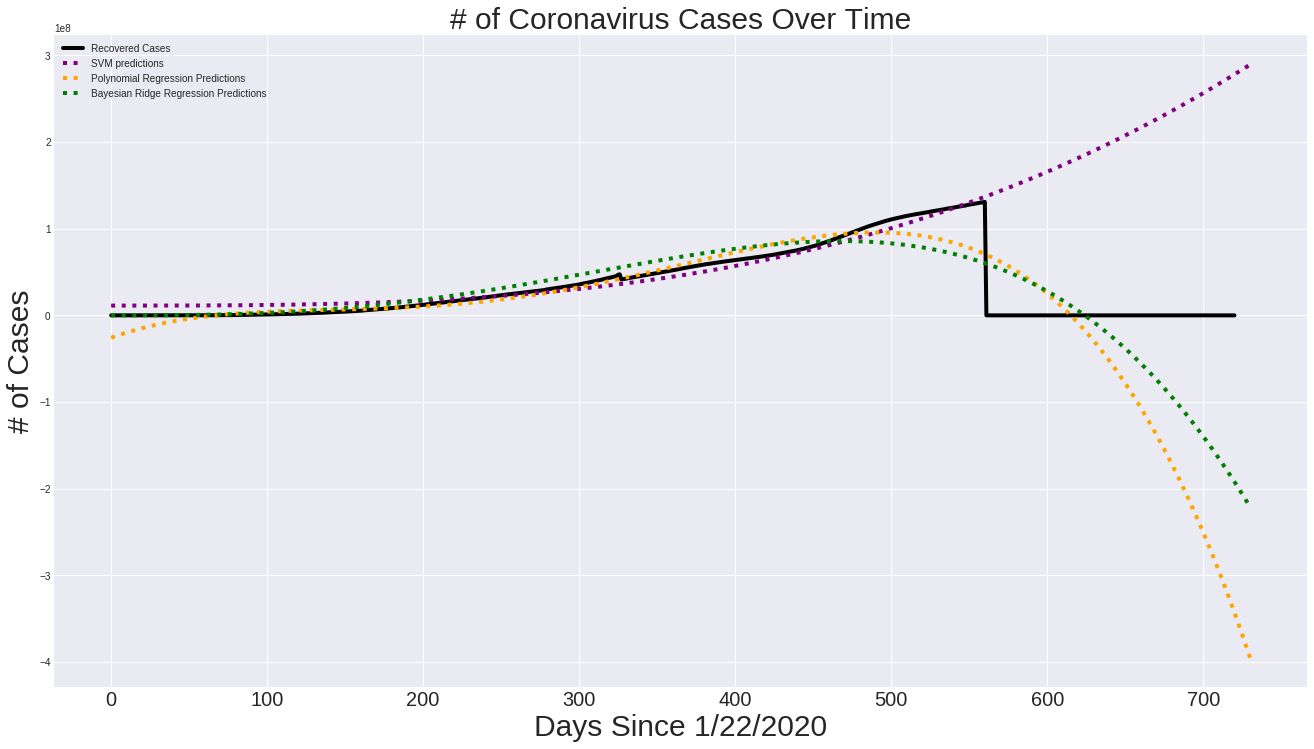

In [54]:
#40 Recovered
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00LX, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00LX, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00LX, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Recovered Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()

In [55]:
X_train_deaths00L, X_test_deaths00L, y_train_deaths00L, y_test_deaths00L = train_test_split(days_since_1_22[50:], total_recovered[50:], test_size=0.12, shuffle=False)
# svm_recovered = svm_search.best_estimator_
svm_deaths00L = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_deaths00L.fit(X_train_deaths00L, y_train_deaths00L)
svm_pred00L = svm_deaths00L.predict(future_forcast)

# check against testing data
svm_test_pred00L = svm_deaths00L.predict(X_test_deaths00L)
print('MAE:', mean_absolute_error(svm_test_pred00L, y_test_deaths00L))
print('MSE:',mean_squared_error(svm_test_pred00L, y_test_deaths00L))

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_deaths00L = poly.fit_transform(X_train_deaths00L)
poly_X_test_deaths00L = poly.fit_transform(X_test_deaths00L)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly00L = PolynomialFeatures(degree=4)
bayesian_poly_X_train_deaths00L = bayesian_poly00L.fit_transform(X_train_deaths00L)
bayesian_poly_X_test_deaths00L = bayesian_poly00L.fit_transform(X_test_deaths00L)
bayesian_poly_future_forcast00L = bayesian_poly00L.fit_transform(future_forcast)

# polynomial regression
linear_model00L = LinearRegression(normalize=True, fit_intercept=False)
linear_model00L.fit(poly_X_train_deaths00L, y_train_deaths00L)
test_linear_pred00L = linear_model00L.predict(poly_X_test_deaths00L)
linear_pred00L = linear_model00L.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred00L, y_test_deaths00L))
print('MSE:',mean_squared_error(test_linear_pred00L, y_test_deaths00L))

print(linear_model00L.coef_)


# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid00L = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian00L = BayesianRidge(fit_intercept=False)
bayesian_search00L = RandomizedSearchCV(bayesian00L, bayesian_grid00L, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search00L.fit(bayesian_poly_X_train_deaths00L, y_train_deaths00L)

bayesian_search00L.best_params_

bayesian_deaths = bayesian_search00L.best_estimator_
test_bayesian_pred00L = bayesian_deaths.predict(bayesian_poly_X_test_deaths00L)
bayesian_pred00L = bayesian_deaths.predict(bayesian_poly_future_forcast00L)
print('MAE:', mean_absolute_error(test_bayesian_pred00L, y_test_deaths00L))
print('MSE:',mean_squared_error(test_bayesian_pred00L, y_test_deaths00L))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MAE: 234764181.56233013
MSE: 5.563939730842608e+16
MAE: 167810385.87136862
MSE: 3.4238792433253212e+16
[[-4.23024565e+07  1.00389653e+06 -7.60470514e+03  2.50995086e+01
  -2.95079764e-02  7.79202674e-06]]
Fitting 3 folds for each of 40 candidates, totalling 120 fits
MAE: 97941221.11627606
MSE: 1.2030399000549328e+16


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


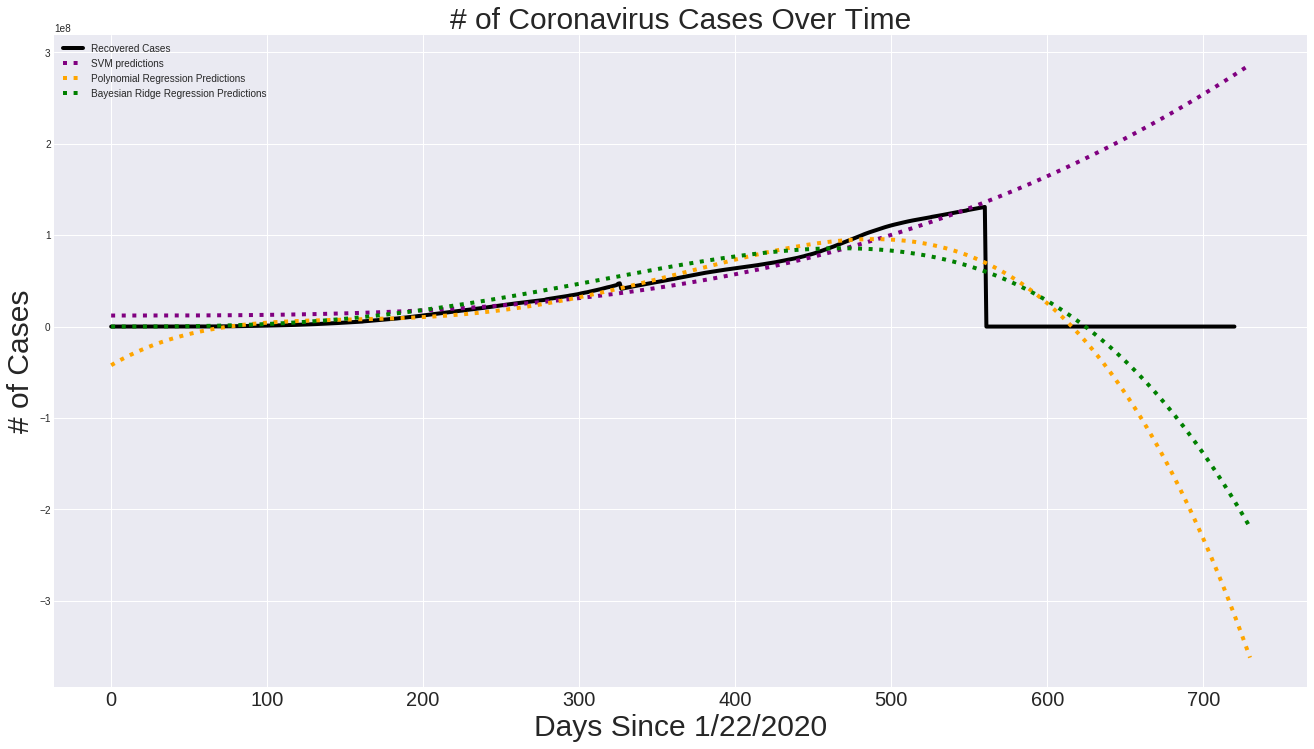

In [56]:
#50 Recovered
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, linestyle='solid', color='black')
plt.plot(future_forcast, svm_pred00L, linestyle='dotted', color='purple')
plt.plot(future_forcast, linear_pred00L, linestyle='dotted', color='orange')
plt.plot(future_forcast, bayesian_pred00L, linestyle='dotted', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Recovered Cases', 'SVM predictions', 'Polynomial Regression Predictions', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=20)
plt.show()